## Day 4
https://adventofcode.com/2025/day/4

In [1]:
import numpy as np

def read_input_4(filename):
    diagram = []
    with open(filename) as f:
        for l in f.readlines():
            r = [ 1 if c=="@" else 0 for c in l.strip()  ]
            diagram.append(r)
    return np.array(diagram)

In [2]:
def movable_rolls(diagram):
    movables = np.zeros(diagram.shape, dtype=int)
    rows, cols = diagram.shape
    for r in range(rows):
        for c in range(cols):
            if  diagram[r,c]==0:
                continue
            neighbors = 0
            for dr in [-1,0,1]:
                for dc in [-1,0,1]:
                    if dr==0 and dc==0:
                        continue
                    nr, nc = r+dr, c+dc
                    if 0<=nr<rows and 0 <=nc<cols:
                        neighbors += diagram[nr,nc]
            if neighbors<4:
                movables[r,c]=1
    return movables

In [3]:
def part1(filename):
    diagram = read_input_4(filename)
    movables = movable_rolls(diagram)
    return movables.sum().sum()

In [4]:
print("Test 1:", part1("examples/example04.txt"))
print("Part 2:", part1("AOC2025inputs/input04.txt"))

Test 1: 13
Part 2: 1493


In [5]:
def part2(filename):
    diagram = read_input_4(filename)
    removed = 0
    movable = 1e32
    while movable:
        movables = movable_rolls(diagram)
        movable = movables.sum().sum()
        removed += movable
        diagram = diagram - movables
    return removed

In [6]:
print("Test 2:", part2("examples/example04.txt"))
print("Part 2:", part2("AOC2025inputs/input04.txt"))

Test 2: 43
Part 2: 9194


In [7]:
import matplotlib.pyplot as plt
from celluloid import Camera
from matplotlib.colors import ListedColormap

def part2animate(filename):
    diagram = read_input_4(filename)
    cmap2 = ListedColormap(['black', 'white'])
    cmap3 = ListedColormap(['black', 'white', 'red'])
    f = plt.figure(figsize=(5,5),dpi=100)
    ax = f.add_axes([0, 0, 1, 1])
    ax.axis('off')
    camera = Camera(f)
    plt.imshow(diagram,cmap=cmap2)
    camera.snap()    
    rolls0 = diagram.sum().sum()
    removed = 0
    movable = 1e32
    while True:
        movables = movable_rolls(diagram)        
        movable = movables.sum().sum()
        if movable==0:
            break
        removed += movable
        diagram_move = diagram + movables
        plt.imshow(diagram_move,cmap=cmap3)
        camera.snap()
        diagram = diagram - movables
        plt.imshow(diagram,cmap=cmap2)
        camera.snap()
    return camera

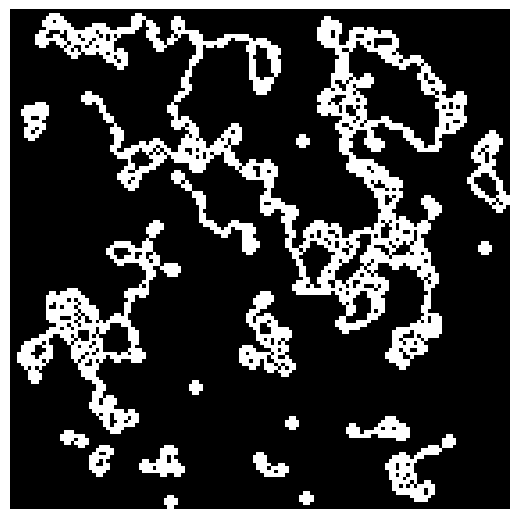

In [8]:
camera = part2animate("AOC2025inputs/input04.txt")
anim = camera.animate(blit=True)
anim.save("visualisation/day03.gif",writer='pillow')

![](visualisation/day03.gif)